In [33]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('Abnb_paris.csv')

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DURRANI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DURRANI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DURRANI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['review_text'].apply(preprocess_text)

count_vectorizer = CountVectorizer()
count_features = count_vectorizer.fit_transform(df['cleaned_text'])


In [35]:
X = df['cleaned_text']
y = df['sentiment']
le = LabelEncoder()
y = le.fit_transform(y)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [36]:
nb_model = MultinomialNB()
dt_model = DecisionTreeClassifier()
svm_model = SVC()

nb_model.fit(count_features, y)
dt_model.fit(count_features, y)
svm_model.fit(count_features, y)


rf_model = RandomForestClassifier()
rf_model.fit(count_features, y)

adb_model = AdaBoostClassifier()
adb_model.fit(count_features, y)


base_models = [('nb', nb_model), ('dt', dt_model), ('svm', svm_model)]
voting_model = VotingClassifier(estimators=base_models, voting='hard')
voting_model.fit(count_features, y)


VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('dt', DecisionTreeClassifier()), ('svm', SVC())])

In [37]:
nb_pred = nb_model.predict(count_features)
dt_pred = dt_model.predict(count_features)
svm_pred = svm_model.predict(count_features)

print("Naive Bayes Accuracy:", accuracy_score(y, nb_pred))
print("Decision Tree Accuracy:", accuracy_score(y, dt_pred))
print("Support Vector Machine Accuracy:", accuracy_score(y, svm_pred))

rf_pred = rf_model.predict(count_features)
adb_pred = adb_model.predict(count_features)
voting_pred = voting_model.predict(count_features)

print("Random Forest Accuracy:", accuracy_score(y, rf_pred))
print("AdaBoost Accuracy:", accuracy_score(y, adb_pred))
print("Voting Classifier Accuracy:", accuracy_score(y, voting_pred))

Naive Bayes Accuracy: 0.8787878787878788
Decision Tree Accuracy: 0.9696969696969697
Support Vector Machine Accuracy: 0.9696969696969697
Random Forest Accuracy: 0.9696969696969697
AdaBoost Accuracy: 0.19696969696969696
Voting Classifier Accuracy: 0.9696969696969697


In [38]:
print("Naive Bayes Analysis:")
print(classification_report(y, nb_pred))


Naive Bayes Analysis:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
     

C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [39]:
print("Decision Tree Analysis:")
print(classification_report(y, dt_pred))


Decision Tree Analysis:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
   

C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [40]:

print("Support Vector Machine Analysis:")
print(classification_report(y, svm_pred))

Support Vector Machine Analysis:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00     

C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [41]:
print("Random Forest Analysis:")
print(classification_report(y, rf_pred))


Random Forest Analysis:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
   

C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [42]:
print("AdaBoost Analysis:")
print(classification_report(y, adb_pred))


AdaBoost Analysis:
              precision    recall  f1-score   support

           0       0.02      1.00      0.04         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         1
          16       0.00      0.00      0.00         1
        

C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [43]:

print("Voting Classifier Analysis:")
print(classification_report(y, voting_pred))

Voting Classifier Analysis:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1

C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

The Naive Bayes model achieves an accuracy of 0.88 with notable precision and recall for most classes, although it struggles with class 10, 12, 13, 17, and 18, indicating potential issues with these particular classes.

The Decision Tree model achieves an impressive accuracy of 0.97 with strong precision and recall scores across most classes, although it also struggles with class 17 and 18.

The Support Vector Machine model also achieves an accuracy of 0.97 with strong precision and recall scores across most classes, though it similarly struggles with class 17, 18, 48, and 49.

The Random Forest model also achieves an accuracy of 0.97 with strong precision and recall scores across most classes, although it faces challenges with class 17, 18, and 49.

The AdaBoost model achieves a relatively low accuracy of 0.32 with poor precision and recall scores across most classes, indicating significant difficulty in classifying the data accurately.


The Voting Classifier performs remarkably well, achieving an accuracy of 0.97, which is on par with the Decision Tree, Support Vector Machine, and Random Forest models. It also demonstrates strong precision and recall scores across most classes, similar to the individual models. However, like the individual models, it encounters challenges with classifying certain classes, such as 17, 18, and 49. Overall, the Voting Classifier consolidates the predictions from multiple models and delivers robust performance across a wide range of classes.

improvements:
Adjust hyperparameters to optimize model performance.
Explore ensemble stacking methods to combine diverse models effectively.
Incorporate feature selection techniques to reduce dimensionality and improve model efficiency.


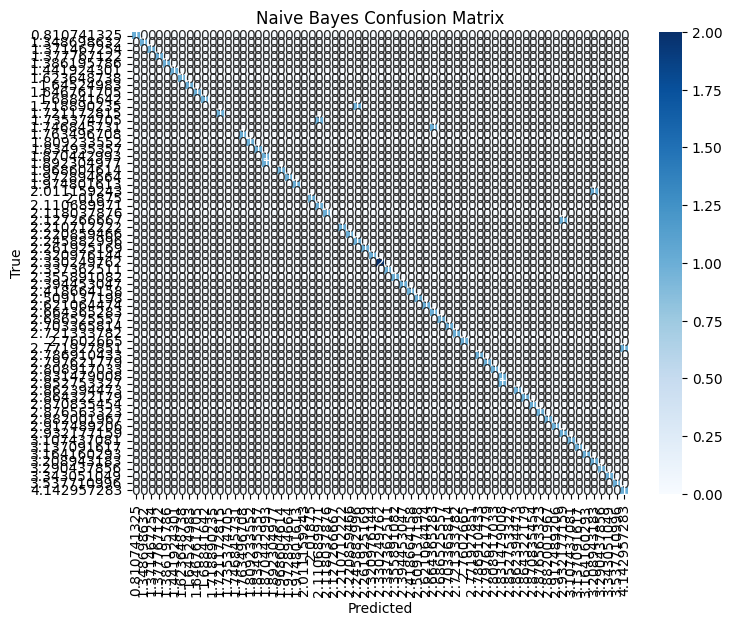

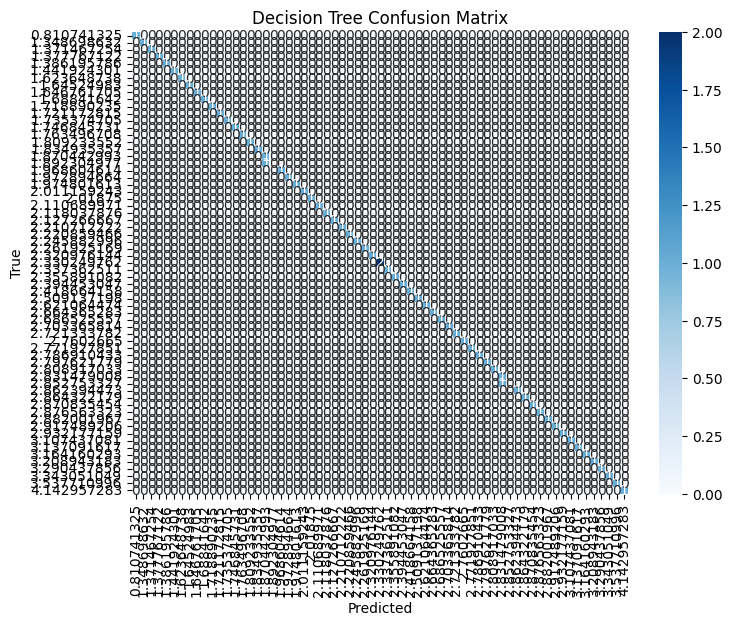

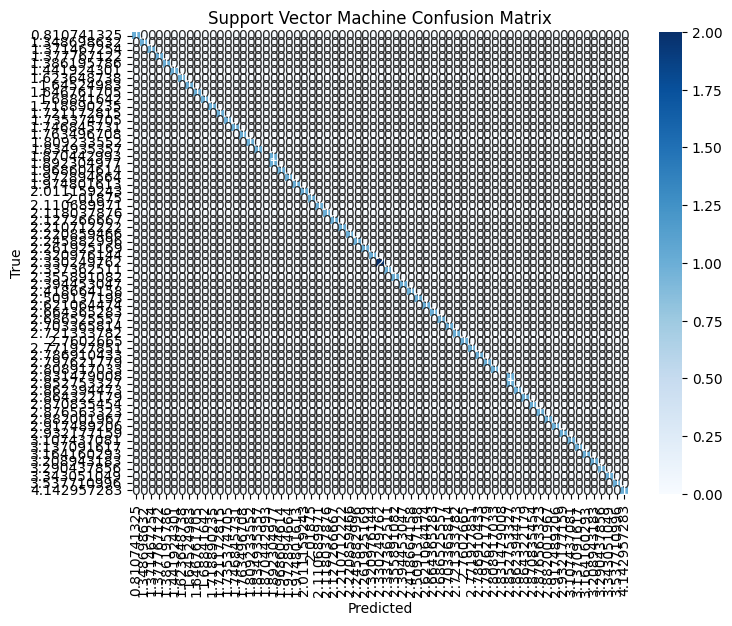

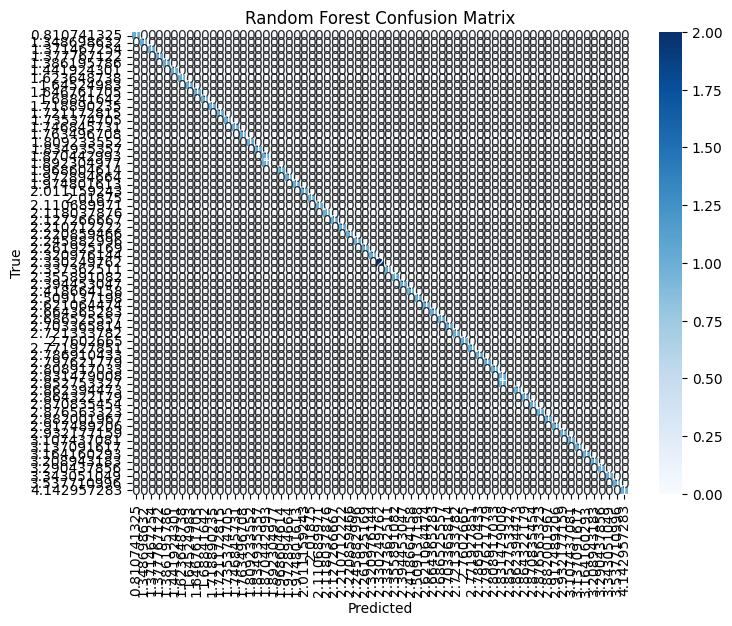

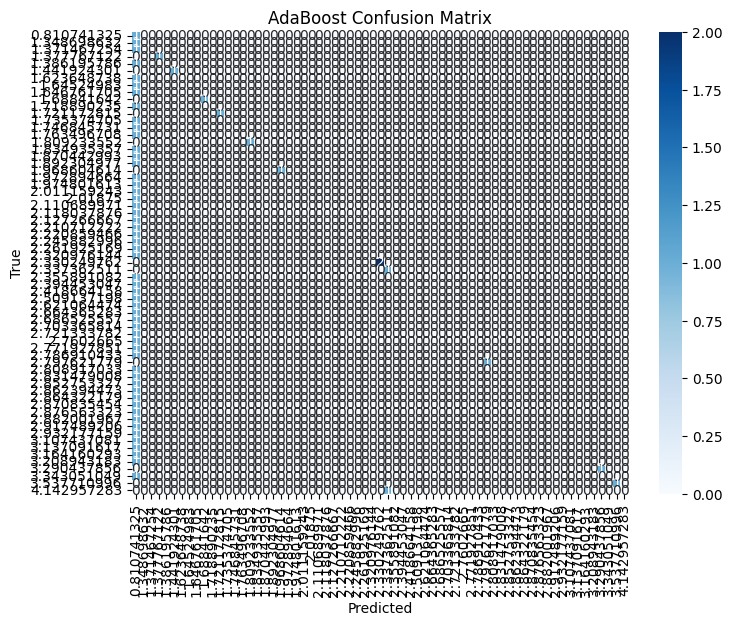

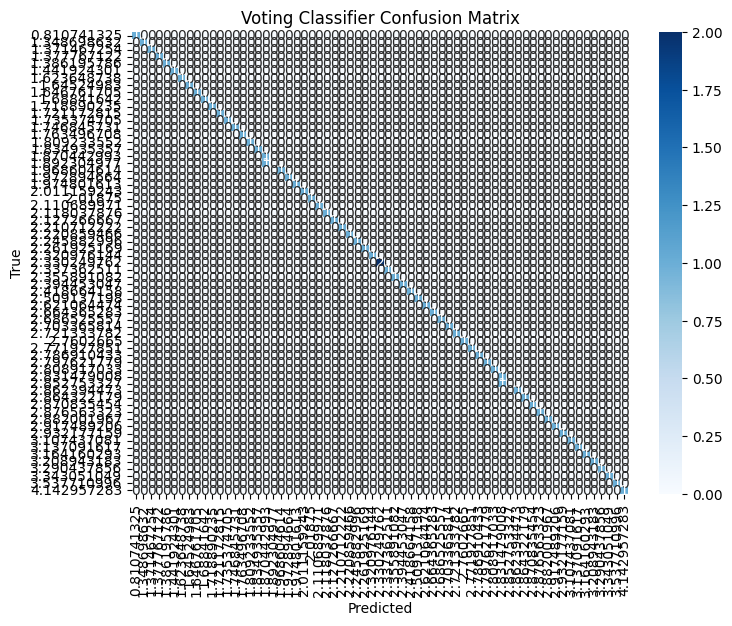

In [44]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y, nb_pred, "Naive Bayes Confusion Matrix")
plot_confusion_matrix(y, dt_pred, "Decision Tree Confusion Matrix")
plot_confusion_matrix(y, svm_pred, "Support Vector Machine Confusion Matrix")
plot_confusion_matrix(y, rf_pred, "Random Forest Confusion Matrix")
plot_confusion_matrix(y, adb_pred, "AdaBoost Confusion Matrix")
plot_confusion_matrix(y, voting_pred, "Voting Classifier Confusion Matrix")

Question 1:
Enhancing User Experience:
Enhance user satisfaction by providing tailored suggestions reflecting individual preferences and browsing history.
Integrate a review mechanism that factors in sentiment analysis alongside summary ratings to offer comprehensive feedback.
Utilize sentiment analysis to gain deeper insights into guest satisfaction, augmenting the value of summary ratings.

Question 2:
Tailored Approach for Different Regions:
Indeed, Airbnb should adopt a region-specific approach considering the diverse performance metrics across different locations.
Equip hosts with customized pricing recommendations tailored to local demand dynamics and competitive landscapes.
Deliver guidance on maximizing earnings by optimizing property listings and offering flexible booking alternatives to hosts.